# BRSM In Class Assignment (28-01-2025)

## Submitted by - Ashish Chokhani(2021102016)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
file_path = './BRSM_Visualisation_Assignment.xlsx'

### 1. Statistical Deception

In [116]:
stat_df = pd.read_excel(file_path,sheet_name='Statistical Deception') 

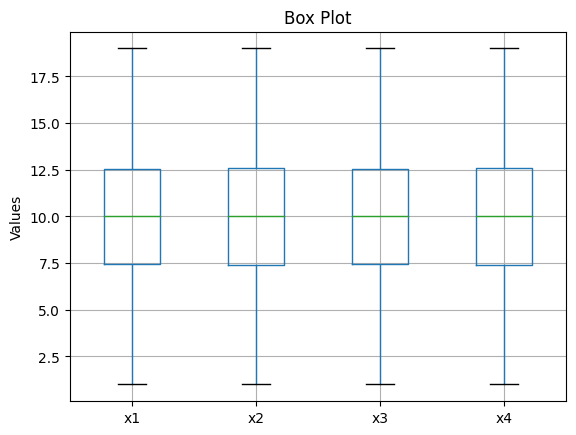

In [117]:
stat_df.boxplot()
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

The visual representation of the box plot for the given data is misleading. Despite the distinct differences in the datasets of all four groups, the resulting box plots appear identical. This uniformity in the box plots suggests an incorrect perception that the groups are identical or very similar. In reality, the maximum value, minimum value, quartiles, and median are similar, contributing to the misleading impression of similar distributions and densities.

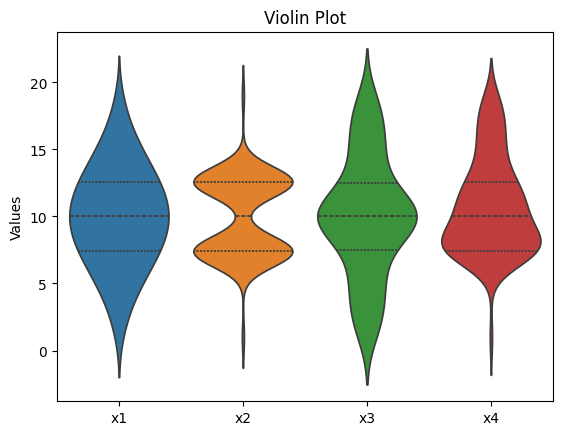

In [118]:
sns.violinplot(data=stat_df, inner="quartile")
plt.title('Violin Plot')
plt.ylabel('Values')
plt.show()

Violin Plot is probably the best visualization of the given data. It provides a detailed view of the distribution of values in each group. It also captures the density of each group. The widened areas in the plot represent regions of higher data density.


### 2. Personality and Motion

In [119]:
df = pd.read_excel(file_path,sheet_name='Movement Personality Results') 

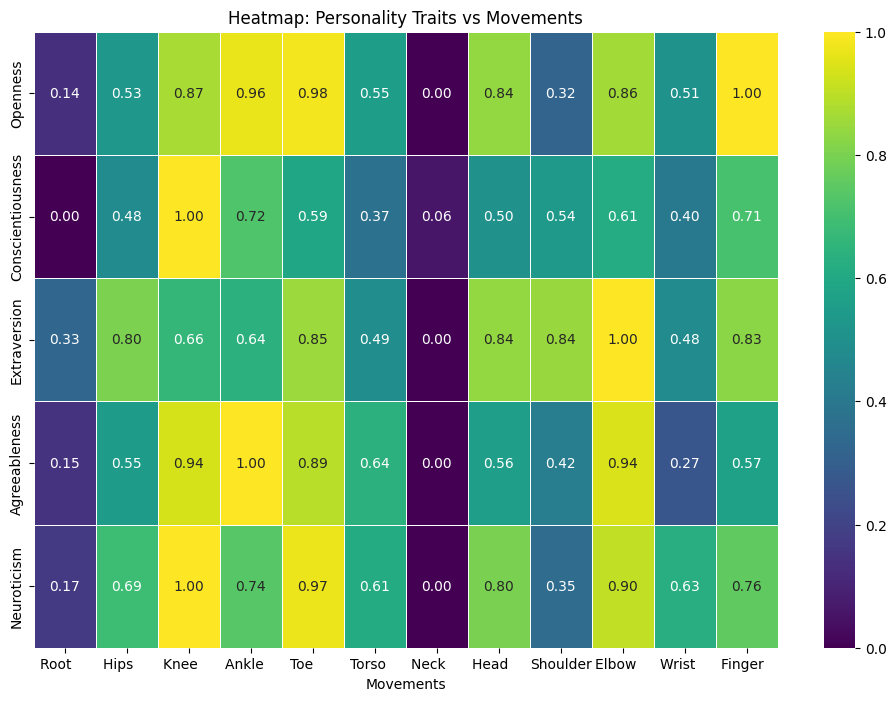

In [120]:
df.set_index('Movements', inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df.T, cmap='viridis', annot=True, fmt=".2f", linewidths=.5) 
plt.title('Heatmap: Personality Traits vs Movements')
plt.show()

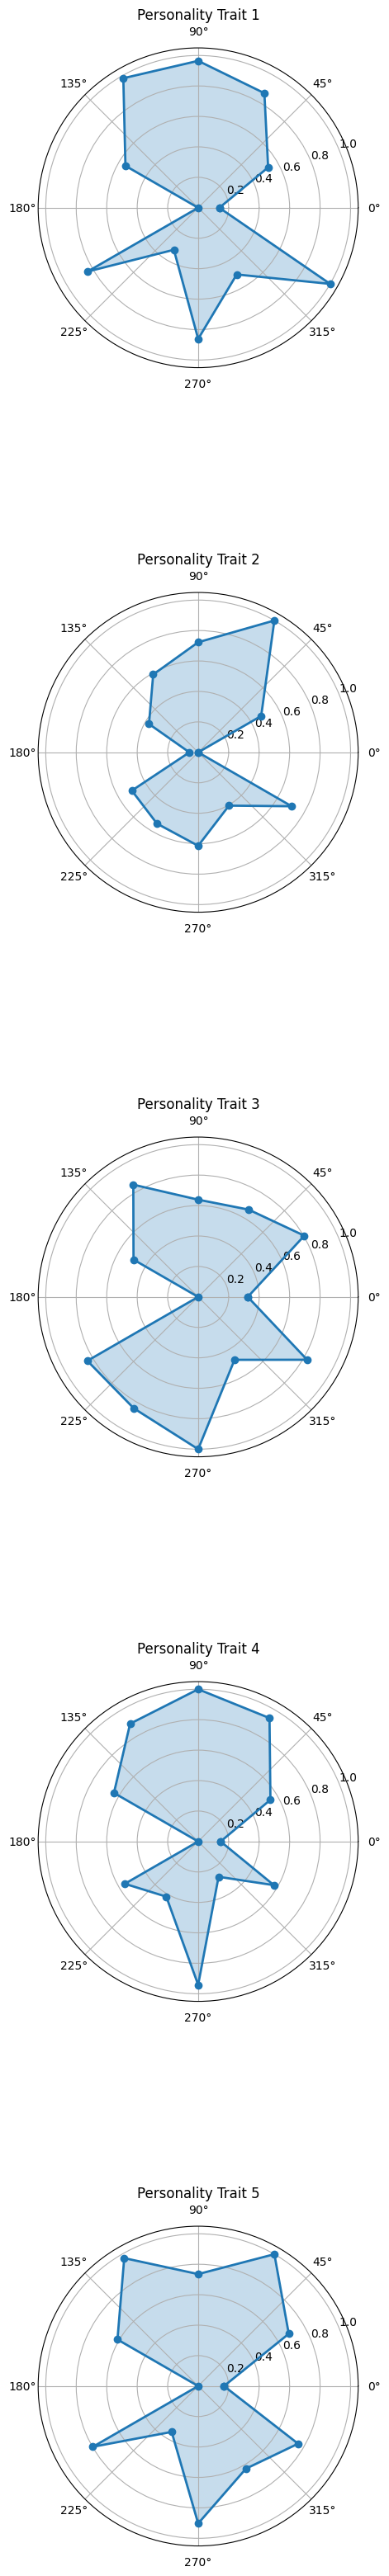

In [121]:
df_joint_importance = df
df_joint_importance = df_joint_importance.transpose()
num_traits = len(df_joint_importance)
num_movements = len(df_joint_importance.columns)
fig, axes = plt.subplots(num_traits, 1, figsize=( 5, 8*num_traits), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.5)
for trait, ax in zip(range(num_traits), axes):
    angles = np.linspace(0, 2 * np.pi, num_movements, endpoint=False) 
    values = df_joint_importance.iloc[trait, :].values
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    ax.plot(angles, values, marker='o', linestyle='-', linewidth=2) 
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Personality Trait {trait+1}')
plt.show()

Spider plot is superior than Heat Map:
Here, soider plot provides a better visualization than heat maps. It allows us to represent each joint’s contribution to predicting multiple personality traits simultaneously. Each spoke in the spider plot can correspond to a different personality trait, and the length of the spoke can indicate the joint’s contribution to that trait. It also provides a spatial representation that allows for a more intuitive understanding of joint contributions. The circular layout can facilitate the identification of patterns and relationships between joints and personality traits

### 3. Data Plotting Adventure
#### 3.1 Subtask 1: The Last of Us

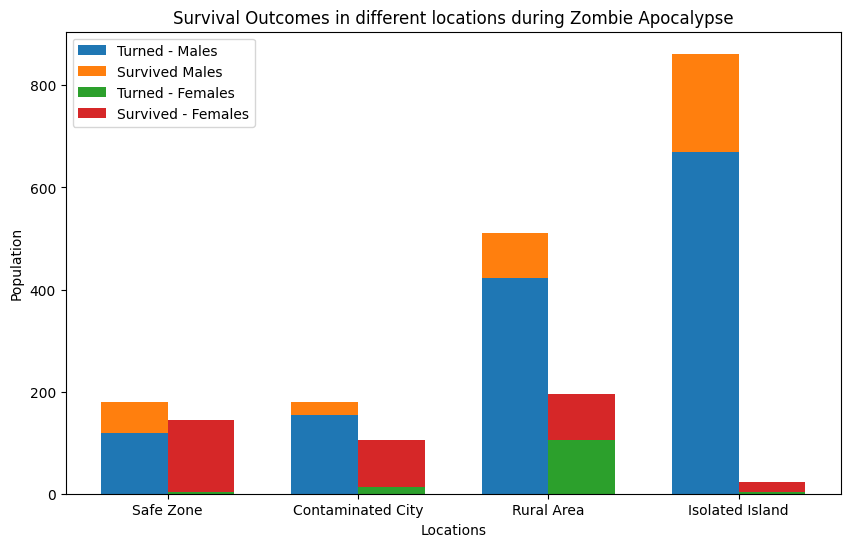

In [122]:
locations = ['Safe Zone', 'Contaminated City', 'Rural Area', 'Isolated Island']
turned_males = [118, 154, 422, 670]
survived_males = [62, 25, 88, 192]
turned_females = [4, 13, 106, 3]
survived_females = [141, 93, 90, 20]
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = np.arange(len(locations))
bar1 = ax.bar(bar_positions, turned_males, bar_width, label='Turned - Males')
bar2 = ax.bar(bar_positions, survived_males, bar_width, label='Survived Males', bottom=turned_males)
bar3 = ax.bar(bar_positions + bar_width, turned_females, bar_width,label='Turned - Females')
bar4 = ax.bar(bar_positions + bar_width, survived_females, bar_width,label='Survived - Females', bottom=turned_females)
ax.set_xlabel('Locations')
ax.set_ylabel('Population')
ax.set_title('Survival Outcomes in different locations during Zombie Apocalypse')
ax.set_xticks(bar_positions + bar_width / 2) 
ax.set_xticklabels(locations)
ax.legend()
plt.show()

Justification:

The stacked bar chart provides a visual representation of the survival outcomes in different locations of different genders during the zombie apocalypse. It effectively represents the relationships and allow for easy comparison across different categories.

Inference:

From the stacked bar plot, we can infer the relative proportions of individuals who turned into zombies and those who survived in each location. It provides a clear comparison of the impact of the zombie apocalypse in different areas and highlights gender-specific differences within each location. For example - in safe zone, females have a very high survival rate and in isolated islands, males have a high probability of turning into zombie


#### 3.2 Subtask 2: Glass Glimpse

In [123]:
glass_df = pd.read_excel(file_path,sheet_name='Glass Glimpse')

/var/folders/hw/qr7q48fs1kj7vhc9lwbs3x2h0000gn/T/ipykernel_21966/627595118.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='RI', data=glass_df, palette='viridis')


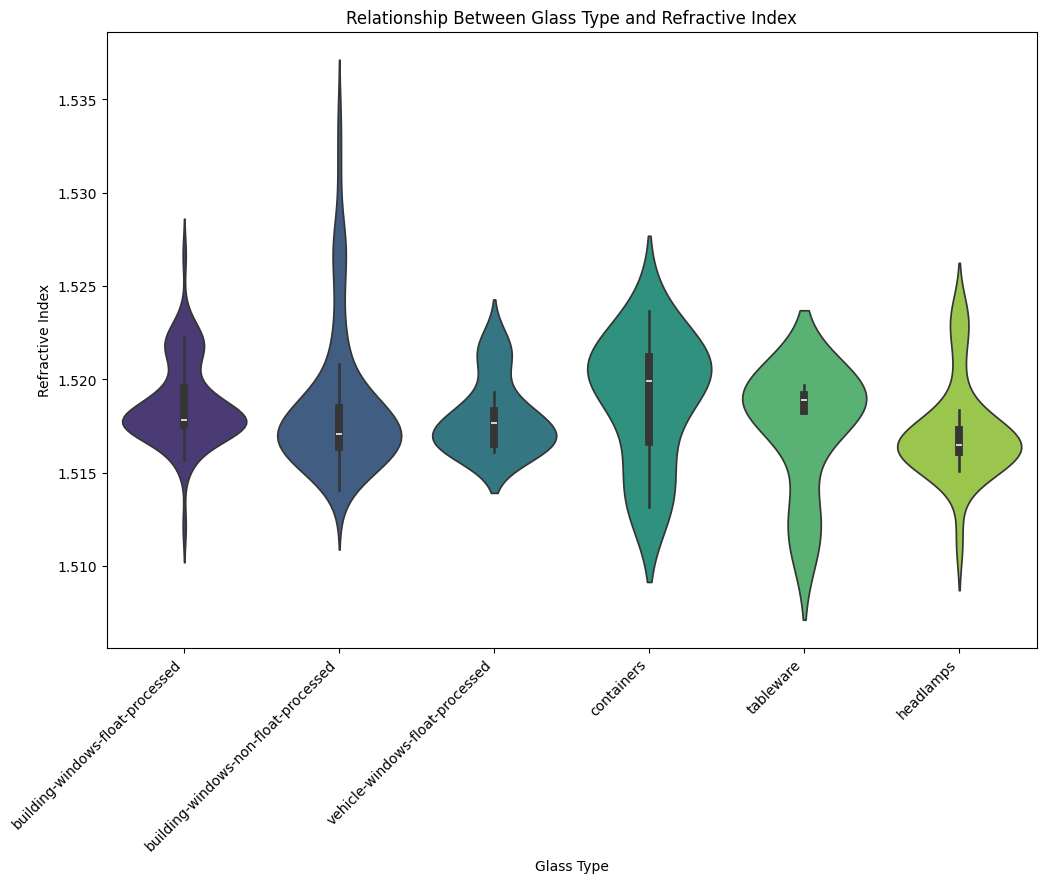

In [124]:
glass_type_mapping = {
    1: 'building-windows-float-processed',
    2: 'building-windows-non-float-processed',
    3: 'vehicle-windows-float-processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

glass_df['Type'] = glass_df['Type'].map(glass_type_mapping)
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type', y='RI', data=glass_df, palette='viridis')
plt.title('Relationship Between Glass Type and Refractive Index') 
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Justification:

Violin plots provide a visual representation of the data distribution, combining a boxplot with a rotated kernel density plot. This allows us to observe not only the central tendency and spread but also the shape of the distribution for each Glass Type. It also helps us to visually compare the distribution of Refractive Index values for different Glass Types.

Inference:

From violin plot, we can infer the RI of different glass types. The width of the violin at a given point represents the density of data points and provide information about the spread of the data. For example - for containers, RI is mostly around 1.520 and for building-windows-float-processed glass, RI is around 1.517


#### 3.3 Subtask 3: Night at the Museum

In [125]:
museum_df = pd.read_excel(file_path,sheet_name='Museum Visitor')

In [126]:
df = museum_df
df['Date'] = pd.to_datetime(museum_df['Month'], format='%b %Y')
df = df.sort_values(by='Date')
df=df.drop(columns=['Date'])
museum_df=df

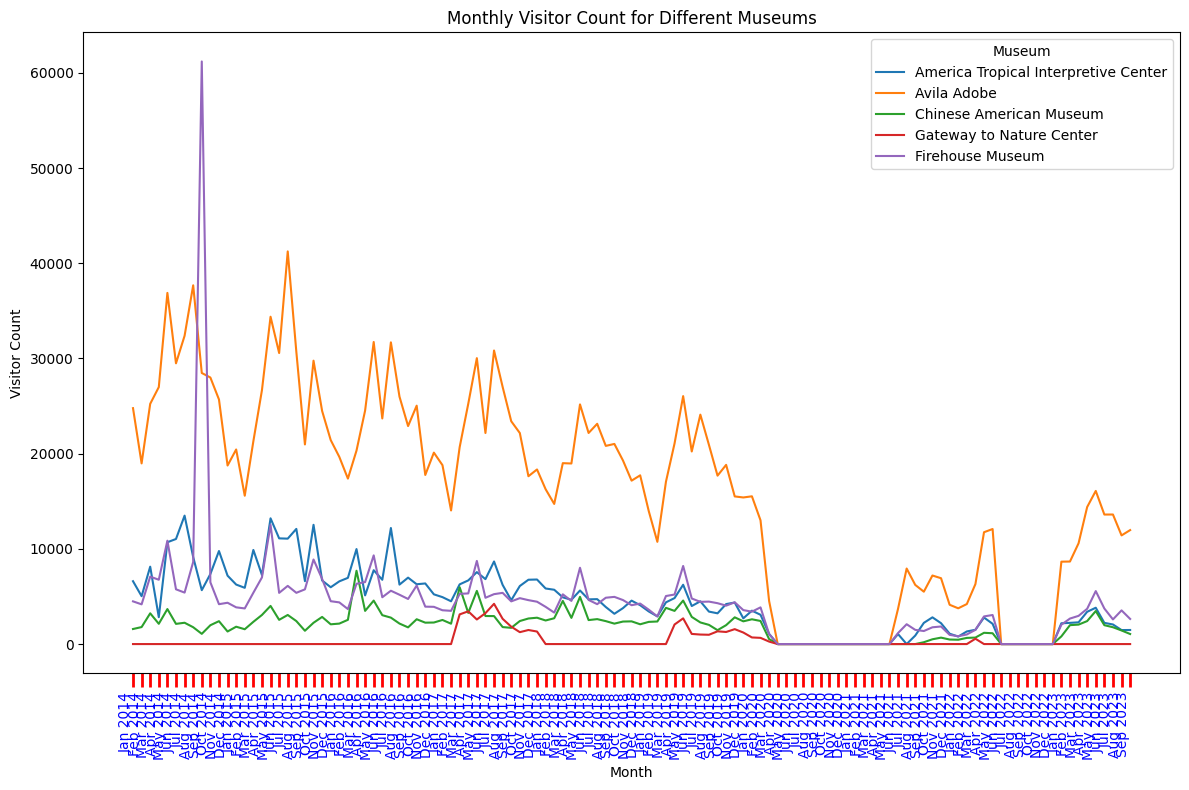

In [127]:
museum_df[['America Tropical Interpretive Center', 'Avila Adobe', 'Chinese American Museum', 'Gateway to Nature Center', 'Firehouse Museum']] = museum_df[['America Tropical Interpretive Center', 'Avila Adobe', 'Chinese American Museum', 'Gateway to Nature Center', 'Firehouse Museum']].fillna(0)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='America Tropical Interpretive Center',data=museum_df, label='America Tropical Interpretive Center')
sns.lineplot(x='Month', y='Avila Adobe', data=museum_df, label='Avila Adobe') 
sns.lineplot(x='Month', y='Chinese American Museum', data=museum_df,label='Chinese American Museum')
sns.lineplot(x='Month', y='Gateway to Nature Center', data=museum_df,label='Gateway to Nature Center')
sns.lineplot(x='Month', y='Firehouse Museum', data=museum_df, label='Firehouse Museum')
plt.title('Monthly Visitor Count for Different Museums')
plt.xlabel('Month')
plt.ylabel('Visitor Count')
plt.tick_params(axis='x', length=10, width=2, color='red', labelcolor='blue')
plt.xticks(range(len(museum_df['Month'].unique())), museum_df['Month'].unique(), rotation=90, ha='right')
plt.legend(title='Museum', loc='upper right')
plt.tight_layout()
plt.show()

Justification:

A time series line plot is chosen as it effectively visualizes the changes in visitor counts over a continuous time period. It allows for a clear comparison of trends, and markers at data points enhance readability.

Inferences:

From the line plot, we can infer various trends in the visitor counts for each museum over the years. Seasonal variations in visitor counts, such as peaks during certain months or years, can be identified by observing recurring patterns in the plot. It allows for a quick comparison of visitor counts between different museums, helping to identify which museums attract more visitors over time. For example - Avila Adobe attracts the most visitors, most visitors come around June-July, no visitors from June 2020 to June 2021 due to COVID.

### 4 Fast and Furious: Heatmap

In [128]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel(file_path,sheet_name='Fast and Furious') 
label_encoder = LabelEncoder()
df[' brand'] = label_encoder.fit_transform(df[' brand'].astype(str)) 

In [129]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

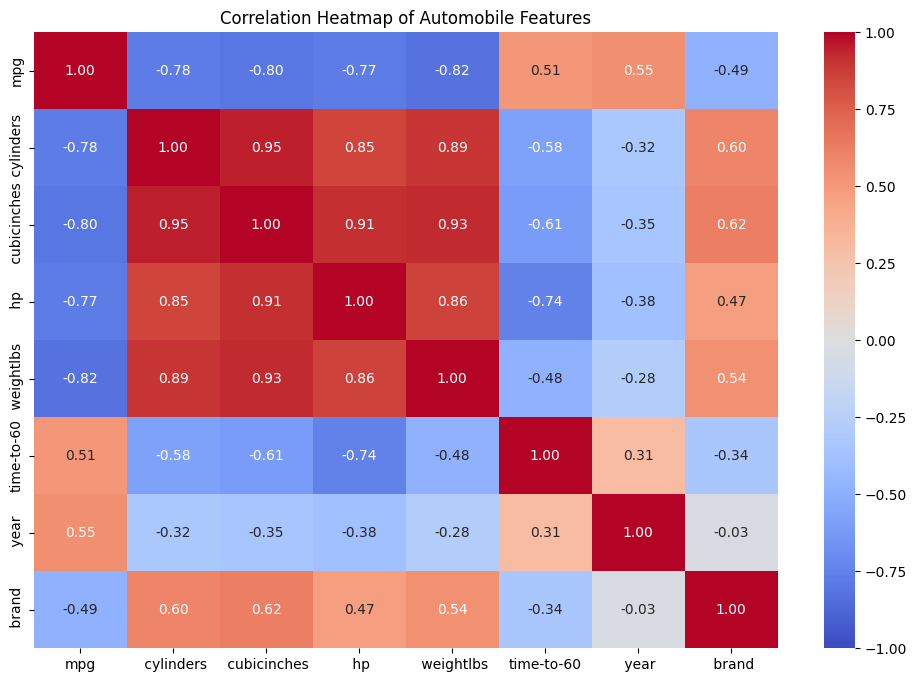

In [130]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1,vmax=1)
plt.title('Correlation Heatmap of Automobile Features') 
plt.show()

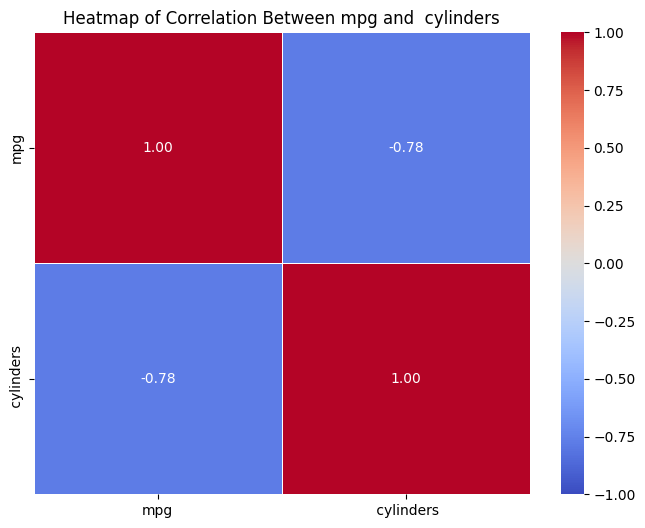

In [131]:
features = ['mpg', ' cylinders']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}') 
plt.show()

Negative correlation between mpg and cylinders. This indicates that as one increases, the other tends to decrease.

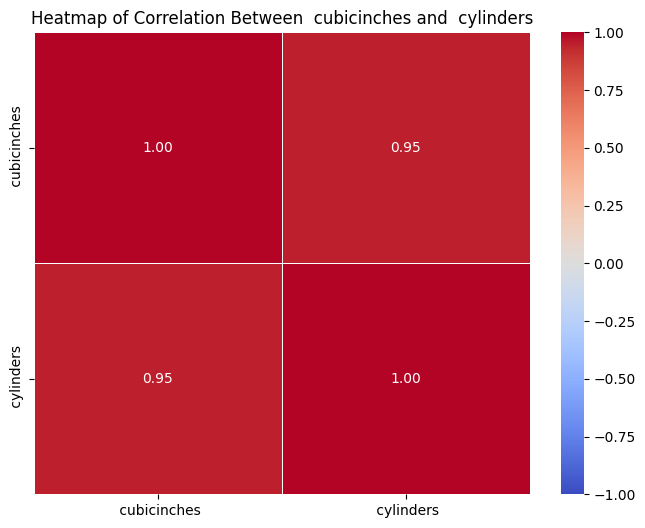

In [132]:
features = [' cubicinches', ' cylinders']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}') 
plt.show()

Positive correlation between cubicinches and cylinders. This indicates that as one increases, the other also tends to increase.

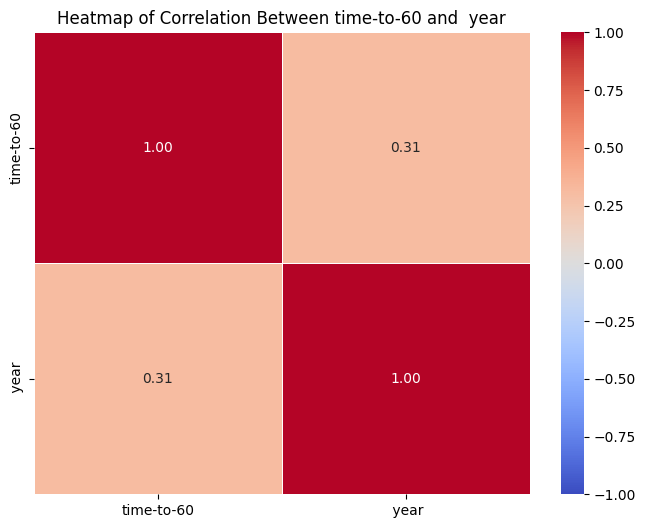

In [133]:
features = ['time-to-60', ' year']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}')
plt.show()

Weak correlation between time-to-60 and year. This indicates a weak relationship between them. It means that they are not much dependent on each other.

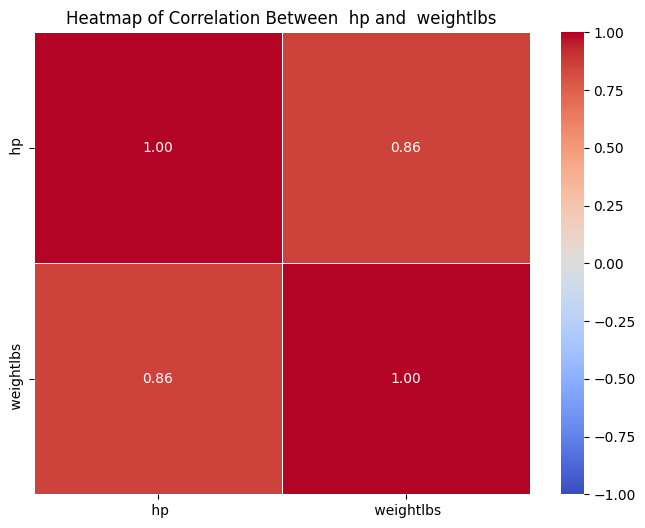

In [134]:
features = [' hp', ' weightlbs']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}') 
plt.show()

Positive correlation between hp and weightlbs. This indicates that as one increases, the other also tends to increase. This is a good correlation as it tells that heavier automobiles have higher hp.

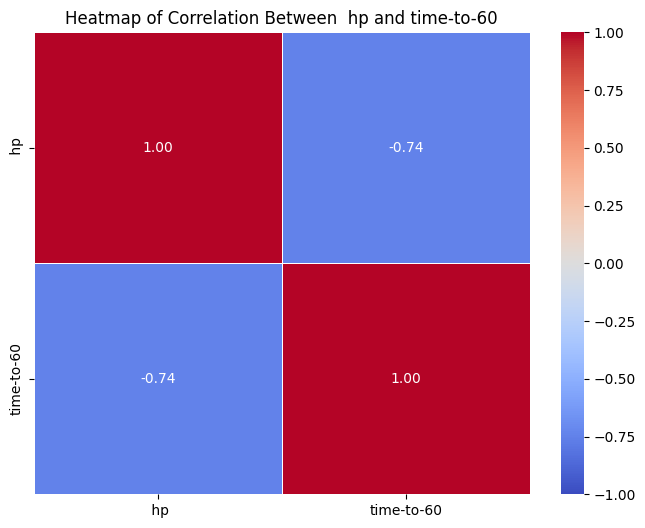

In [135]:
features = [' hp', 'time-to-60']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}')
plt.show()

Negative correlation between hp and time-to-60. This indicates that as one increases, the other tends to decrease. This is a good correlation as it tells us that if hp is high time-to-60 will be low.

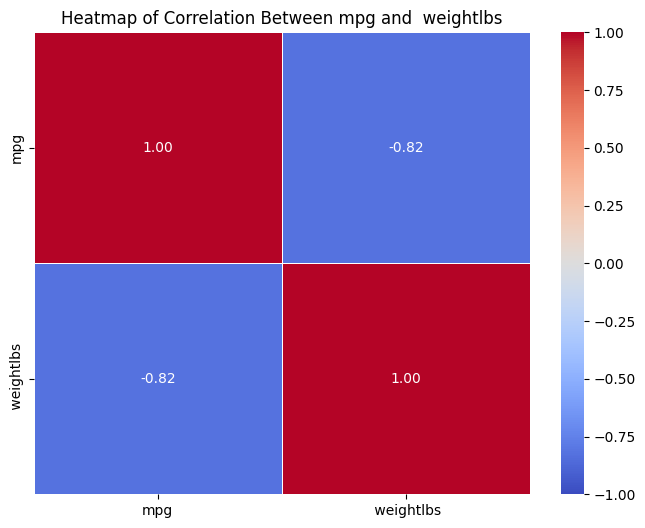

In [136]:
features = ['mpg', ' weightlbs']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}') 
plt.show()

Negative correlation between mpg and weightlbs. This indicates that as one increases, the other tends to decrease. This is a good correlation as it tells us that that lighter automobiles have higher mpg.

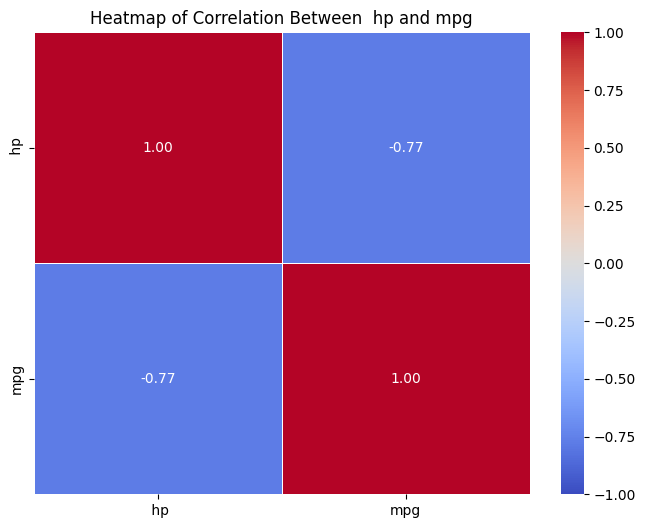

In [137]:
features = [' hp', 'mpg']
df_selected = df[features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5, vmin=-1 ,vmax=1)
plt.title(f'Heatmap of Correlation Between {features[0]} and {features[1]}') 
plt.show()

Negative correlation between mpg and weightlbs. This indicates that as one increases, the other tends to decrease. This is a good correlation as it tells us that that automobiles with higher hp have lower mpg.